# Probability Mass Functions

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

In [3]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dat.gz")

In [4]:
from nsfg import read_fem_resp

resp = read_fem_resp()
resp.shape

(7643, 3092)

### Exercise 3.1

Select the column numbabes, which records the “number of babies born alive” to each respondent. Make a FreqTab object and display the frequencies of the values in this column. Check that they are consistent with the frequencies in the code book. Are there any special values that should be replaced with NaN?

Then make a Pmf object and plot it as a bar graph. Is the distribution symmetric, skewed to the left, or skewed to the right?

In [ ]:
resp.numbabes.value_counts().sort_index()

0     3229
1     1519
2     1603
3      828
4      309
5       95
6       29
7       15
8        8
9        2
10       3
16       1
22       1
97       1
Name: numbabes, dtype: int64

Text(0, 0.5, 'Number of Babies')

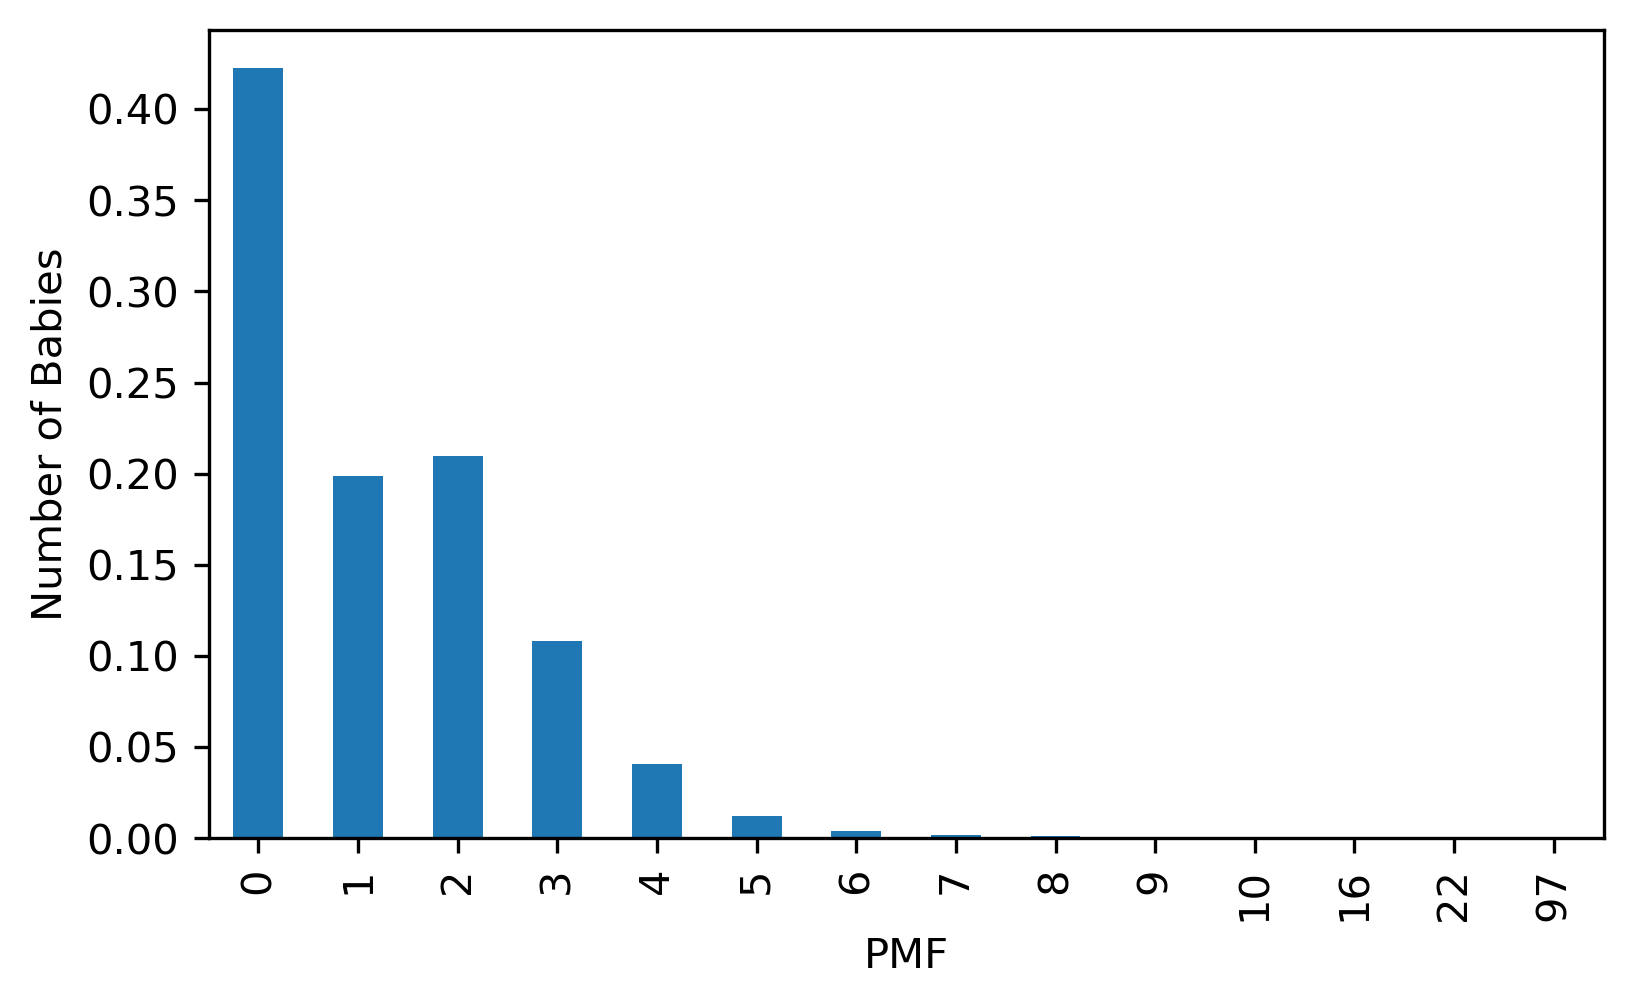

In [10]:
(resp.numbabes.value_counts().sort_index() / len(resp.numbabes)).plot.bar()
plt.xlabel("PMF")
plt.ylabel("Number of Babies")

### Exercise 3.2

In the same way that the mean identifies a central point in a distribution, and variance quantifies its spread, there is another statistic, called skewness, that indicates whether a distribution is skewed to the left or right.

Given a sample, we can compute the skewness by computing the sum of the cubed deviations and dividing by the standard deviation cubed. For example, here’s how we compute the skewness of numbabes.

In [13]:
numbabes = resp["numbabes"].replace(97, np.nan)

In [14]:
deviations = numbabes - numbabes.mean()
skewness = np.mean(deviations**3) / numbabes.std(ddof=0) ** 3
skewness

1.7018914266755056

A positive value indicates that a distribution is skewed to the right, and a negative value indicates that it is skewed to the left.

A positive value indicates that a distribution is skewed to the right, and a negative value indicates that it is skewed to the left.

If you are given a Pmf, rather than a sequence of values, you can compute skewness like this:

Compute the deviation of each quantity in the Pmf from the mean.

Cube the deviations, multiply by the probabilities in the Pmf, and add up the products.

Divide the sum by the standard deviation cubed.

Write a function called pmf_skewness that takes a Pmf object and returns its skewness.

Use your function and the Pmf of numbabes to compute skewness, and confirm you get the same result we computed above.

In [15]:
pmf = numbabes.value_counts().sort_index() / len(numbabes)

In [44]:
def pmf_skewness(pmf):
    mean = sum(pmf * pmf.index)
    deviations = sum((pmf.index - mean)**2*pmf)
    std = np.sqrt(deviations)
    standardized_values = (pmf.index - mean) / std
    skewness = sum(standardized_values ** 3 * pmf)

    return skewness
    

In [45]:
pmf_skewness(pmf)

1.7023483119210345

### Exercise 3.3

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample at all.

From `resp`, select `numkdhh`, which records the number of children under 18 in each respondent’s household. Make a `Pmf` of the values in this column.

Use the bias function to compute the distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [49]:
pmf = resp.numkdhh.value_counts().sort_index() / len(resp.numkdhh)

In [50]:
pmf

0    0.466178
1    0.214052
2    0.196258
3    0.087139
4    0.025644
5    0.010729
Name: numkdhh, dtype: float64

In [51]:
from empiricaldist import Pmf

In [52]:
def bias(pmf, name):
    # multiply each probability by class size
    ps = pmf.ps * pmf.qs

    # make a new Pmf and normalize it
    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

In [56]:
og_pmf = Pmf.from_seq(resp.numkdhh)
og_pmf

,probs
0,0.466178
1,0.214052
2,0.196258
3,0.087139
4,0.025644
5,0.010729


In [58]:
observed_pmf = bias(og_pmf, "")
observed_pmf

,probs
0,0.000000
1,0.208993
2,0.383240
3,0.255238
4,0.100153
5,0.052376


Text(0.5, 29.666666666666647, 'Number of children in the household')

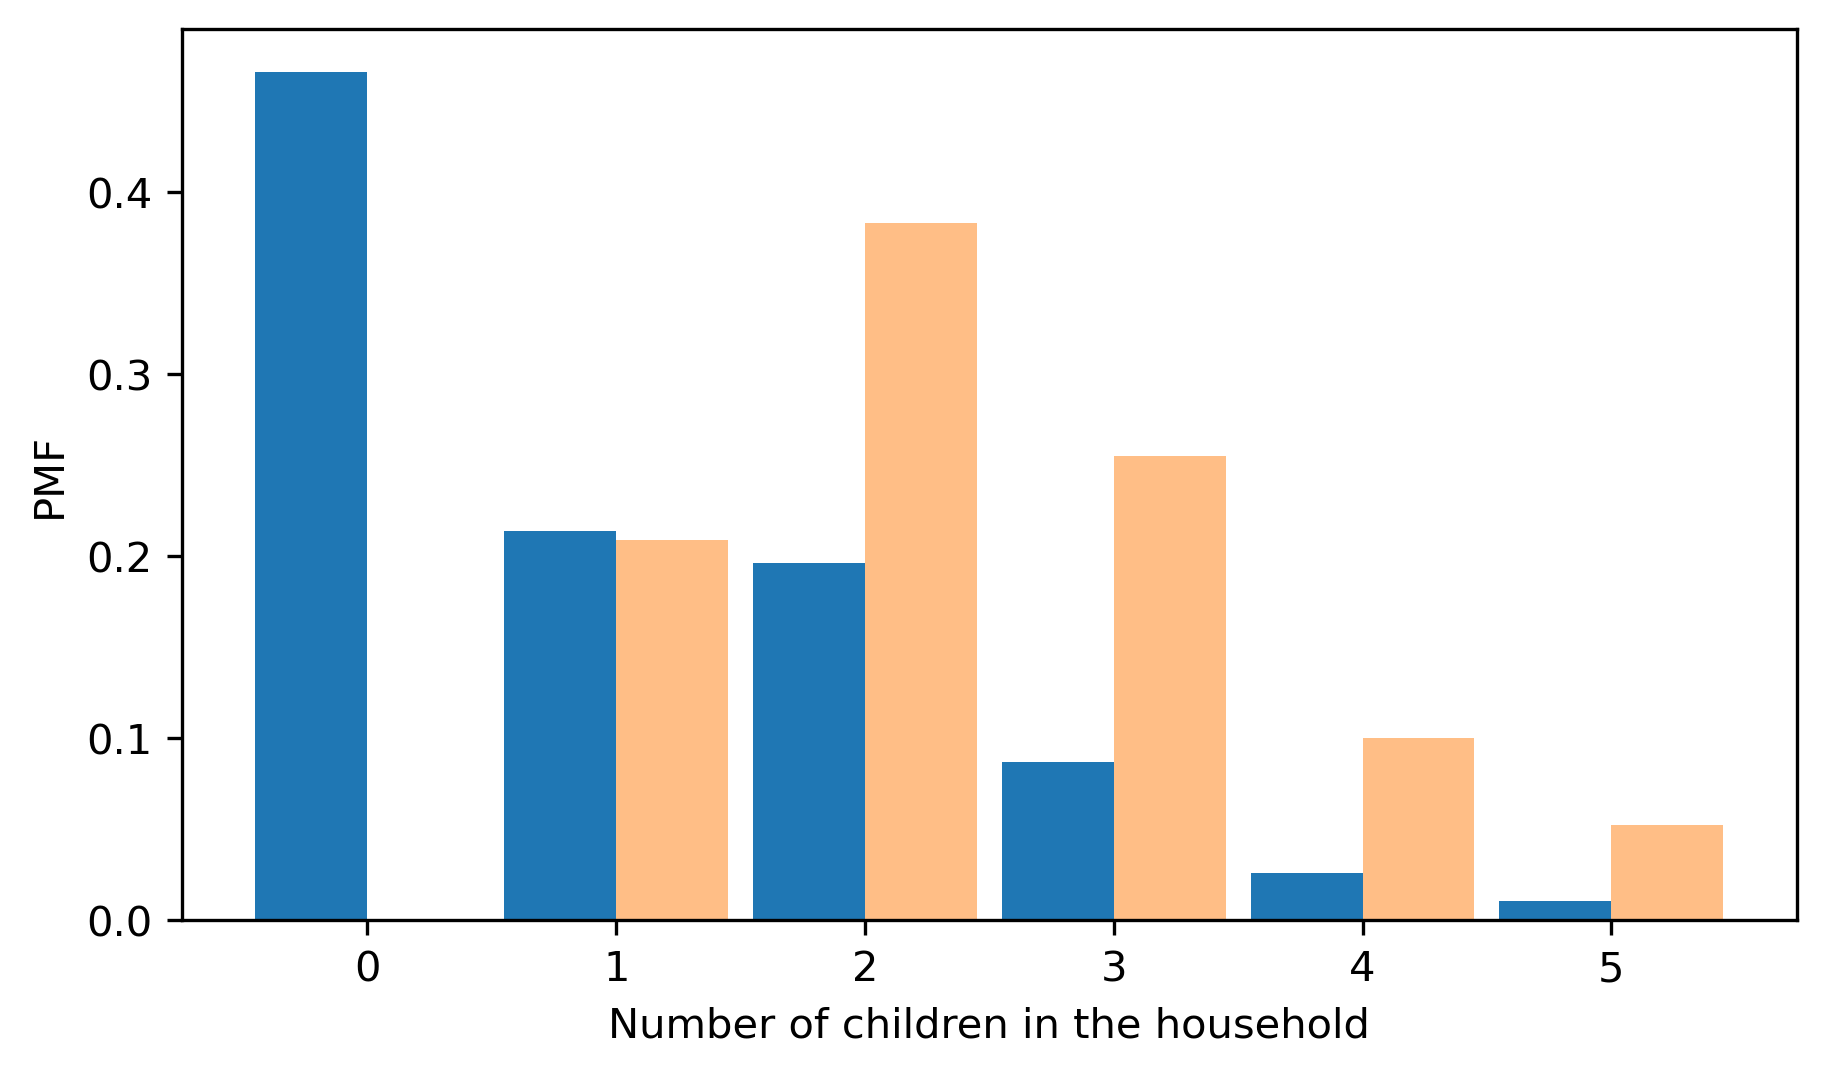

In [62]:
from thinkstats import two_bar_plots

two_bar_plots(og_pmf, observed_pmf)
plt.ylabel("PMF")
plt.xlabel("Number of children in the household")

In [64]:
print("Actual mean:", og_pmf.mean())
print("Observed mean:", observed_pmf.mean())

Actual mean: 1.024205155043831
Observed mean: 2.403679100664282
